In [7]:
# change notes 11/22/24 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# moved data.yaml, model, and dataset locations to LOCAL dir preventing model training path errors
# updated yaml.data to all 10 construction classes to prevent model training IndexError

# added markdowns
# added suggested WIP
# added new datasets link

# added label dir splitting process
# prevented raw_images and raw_labels from being cleared to keep for multiple runs

# trained model from custom labels and construction dataset labels
# added model result images
# added print for model train execution time
# used model to draw bbox instead of function
# added test image and predicted image *from custom dataset*
# cleared runs and predictions for each execution
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# change notes 11/24/24 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# added image augmentations to custom dataset for model training
# updated model training to 60 epochs from 30 epochs
# updated wip and added 11/24 change notes
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Dataset (2859 raw_images and 2859 raw_labels):

construction_ppe: 2851 images
https://www.kaggle.com/datasets/snehilsanyal/construction-site-safety-image-dataset-roboflow/code
<br>custom dataset: 58 images
<br><br>
download new contstruction+custom "datasets" folder 
<br>to<u><b> local script directory </u></b> (will be ignored to git):
<br>https://uofsandiego-my.sharepoint.com/:f:/g/personal/dverduzco_sandiego_edu/ErhP9WM76B9Ho2PhSeBd13UB0fADbGPbVfGnB6LPDl_kUw?e=mJiznb

suggested WIP: 
<br><b><u>generate graphs based on test data as reference
<br>add live video webcam feed</b></u>

<br>add any further images/ predictions needed
<br>add any further fine tuning on hyperparams
<br>test other models
<br>k-fold cross validation
<br>clean up notebook code, organization of folders/files as needed

# Import Libraries

In [1]:
# import modules
import os # file 
import shutil
import time
import glob
import cv2 # opencv for images
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
from ultralytics import YOLO #for obeject detection
import albumentations as A # for image augmentation
from albumentations.pytorch import ToTensorV2 # for image formating
from torchvision.transforms import ColorJitter

import msaai

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

dataset_base_dir = "../datasets"
image_base_dir = dataset_base_dir + "/images"
labels_base_dir = dataset_base_dir + "/labels"

# Define directories to reset
image_dirs = {
    "train": f"{image_base_dir}/train",
    "valid": f"{image_base_dir}/valid",
    "test": f"{image_base_dir}/test",
}
label_dirs = {
    "train": f"{labels_base_dir}/train",
    "valid": f"{labels_base_dir}/valid",
    "test": f"{labels_base_dir}/test",
}

## Clear the "train", "test", "valid" image folders from "datasets" folder

In [2]:
directories_to_reset = list(image_dirs.values()) + list(label_dirs.values())

# Reset directories
msaai.reset_directories(directories_to_reset)

print("Directories reset and ready for use.")

Deleted existing directory: ../datasets/images/train
Recreated directory: ../datasets/images/train
Deleted existing directory: ../datasets/images/valid
Recreated directory: ../datasets/images/valid
Deleted existing directory: ../datasets/images/test
Recreated directory: ../datasets/images/test
Deleted existing directory: ../datasets/labels/train
Recreated directory: ../datasets/labels/train
Deleted existing directory: ../datasets/labels/valid
Recreated directory: ../datasets/labels/valid
Deleted existing directory: ../datasets/labels/test
Recreated directory: ../datasets/labels/test
Directories reset and ready for use.


## Split into train/valid/test files from "raw_image" and "raw_label" folders
### (NOTE: "./datasets/raw_images" and "./datasets/raw_labels" folders must already contain all images and all labels)

In [3]:
source_image_dir = dataset_base_dir + "/raw_images"
source_label_dir = dataset_base_dir + "/raw_labels"

# combine and assign to DataFrame
img_split_df = msaai.img_train_test_split(source_image_dir)

# copy files from source to folders 
msaai.arrange_image_and_label_files(img_split_df, source_image_dir, source_label_dir, image_dirs, label_dirs)


# Augment and replace all custom images

In [4]:
# Directories containing images
folders = [image_dirs["test"], image_dirs["valid"]]

# Get total number of files to process
total_files = sum(
    len([f for f in os.listdir(folder) if f.startswith('scene') and f.endswith(('.jpg', '.png'))]) for folder in folders # modify file desc as needed
)

# Apply transformation to all images in both folders
processed_files = 0
for image_dir in folders:
    for filename in os.listdir(image_dir):
        if filename.startswith('scene') and filename.endswith(('.jpg', '.png')): # modify file desc as needed
            image_path = os.path.join(image_dir, filename)
            image = Image.open(image_path)
            augmented_image = ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)(image)
            augmented_image.save(os.path.join(image_dir, filename))
            processed_files += 1
            print(f'Augmented {processed_files} of {total_files} custom images', end='\r') # modify file desc as needed

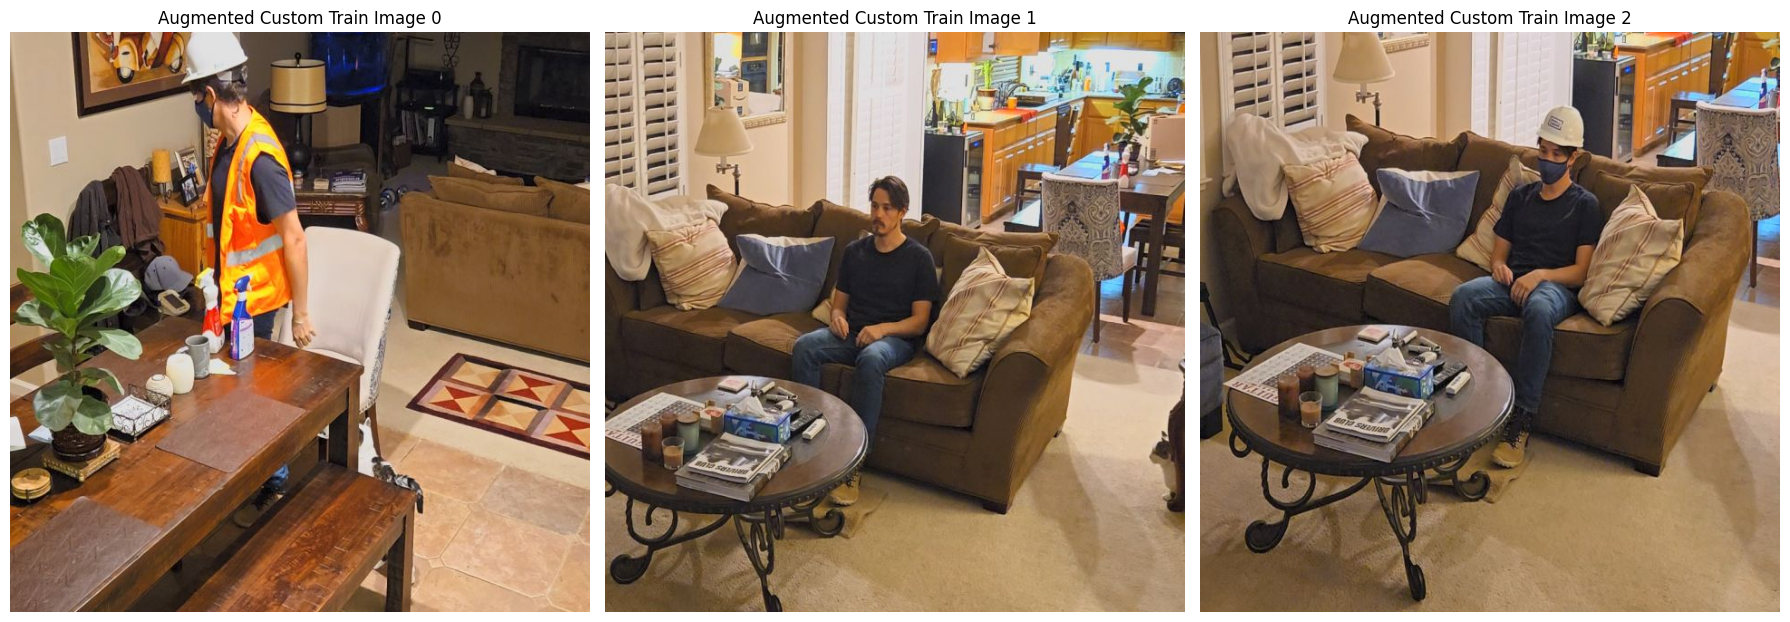

In [5]:
# Get the paths to the first three custom images
image_paths = glob.glob(f"{image_dirs["train"]}/scene*.jpg")[:3]

# Check if there are enough images
if len(image_paths) < 3:
    print("Not enough images found!")
else:
    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 7))  # Adjust the figsize as needed

    for i, ax in enumerate(axes):
        # Load and display each image
        image = mpimg.imread(image_paths[i])
        ax.imshow(image)
        ax.axis('off')  # Hide axes
        ax.set_title(f"Augmented Custom Train Image {i}")

    plt.tight_layout()
    plt.show()

# Train YOLOv8 from custom + construction dataset

In [ ]:
from pathlib import Path

#resolve yaml path
train_dir = "../train"
data = os.path.join(train_dir, "data.yaml")
yaml_path = str(Path(data).resolve())


# Time count
start = time.time()
for i in range(10000000):
    pass
    
# Delete all previous model runs
shutil.rmtree(f"{train_dir}/runs/", ignore_errors=True)

model = YOLO("../models/yolov8n.pt")
model.train(data=yaml_path, epochs = 50, val = True, agnostic_nms=False, seed=88)

# Time end
end = time.time()
elapsed_seconds = end - start
elapsed_minutes = elapsed_seconds / 60
print(f"Total model train time: {elapsed_minutes:.2f} minutes")

New https://pypi.org/project/ultralytics/8.3.39 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.34 🚀 Python-3.12.4 torch-2.5.1 CPU (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=../models/yolov8n.pt, data=/Users/victorhugogermano/Development/aai-501-final-project/train/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=88, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=

train: Scanning /Users/victorhugogermano/Development/aai-501-final-project/datasets/labels/test... 287 images,

train: New cache created: /Users/victorhugogermano/Development/aai-501-final-project/datasets/labels/test.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /Users/victorhugogermano/Development/aai-501-final-project/datasets/labels/valid... 571 images, 

val: WARNING ⚠️ /Users/victorhugogermano/Development/aai-501-final-project/datasets/images/valid/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed
val: New cache created: /Users/victorhugogermano/Development/aai-501-final-project/datasets/labels/valid.cache


Plotting labels to ../train/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to ../train/runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.451       3.78      1.546        262        640: 100%|██████████| 18/18 [01:43<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 12/

In [52]:
# Show conf curve
image_path = train_dir + "/runs/detect/train/F1_curve.png"
Image.open(image_path).resize((800,400))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/victorhugogermano/Development/aai-501-final-project/train/runs/detect/train/F1_curve.png'

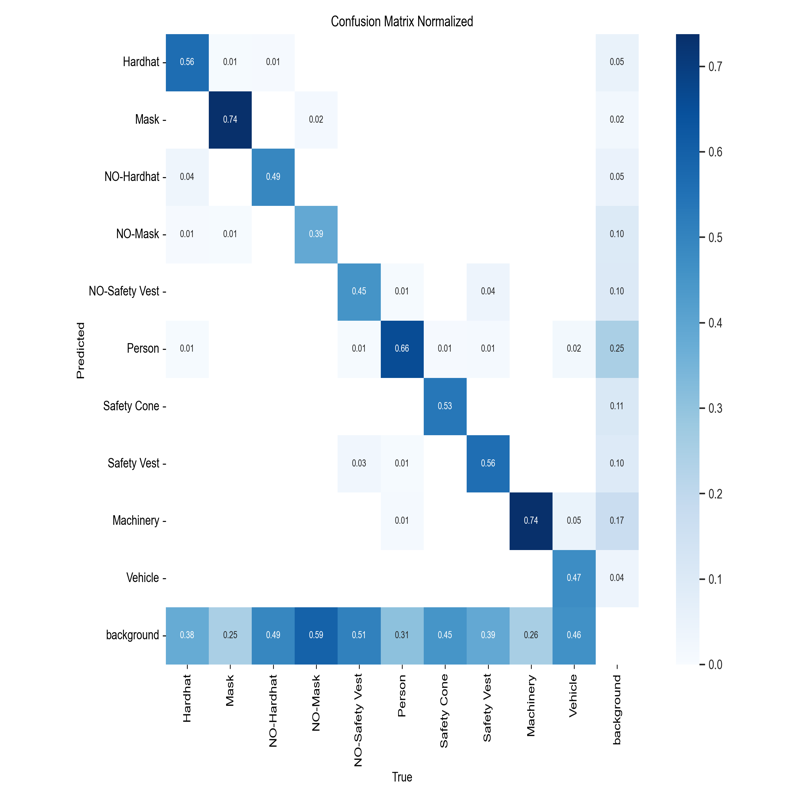

In [153]:
# Show canf matrix
image_path = "./runs/detect/train/confusion_matrix_normalized.png"
Image.open(image_path).resize((800,800))

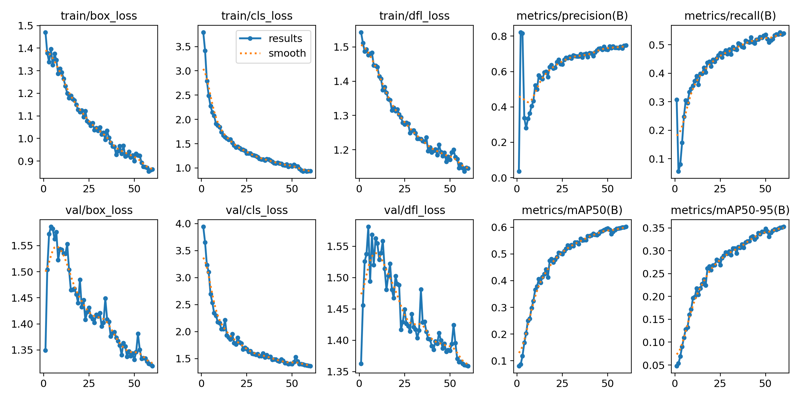

In [154]:
# Show conf curve
image_path = "./runs/detect/train/results.png"
Image.open(image_path).resize((800,400))

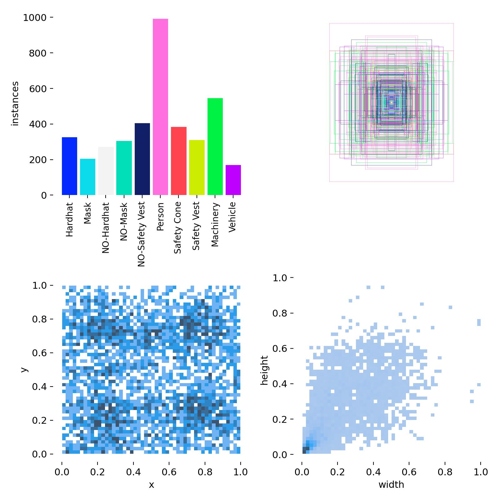

In [155]:
# Show labels diagrams
image_path = "runs/detect/train/labels.jpg"
Image.open(image_path).resize((500,500))

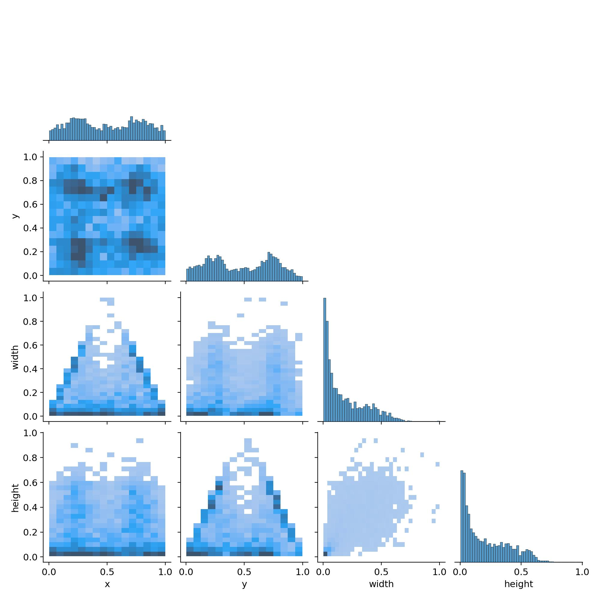

In [156]:
# Show correlogram
image_path = "runs/detect/train/labels_correlogram.jpg"
Image.open(image_path).resize((600,600))

# Images from test folder:

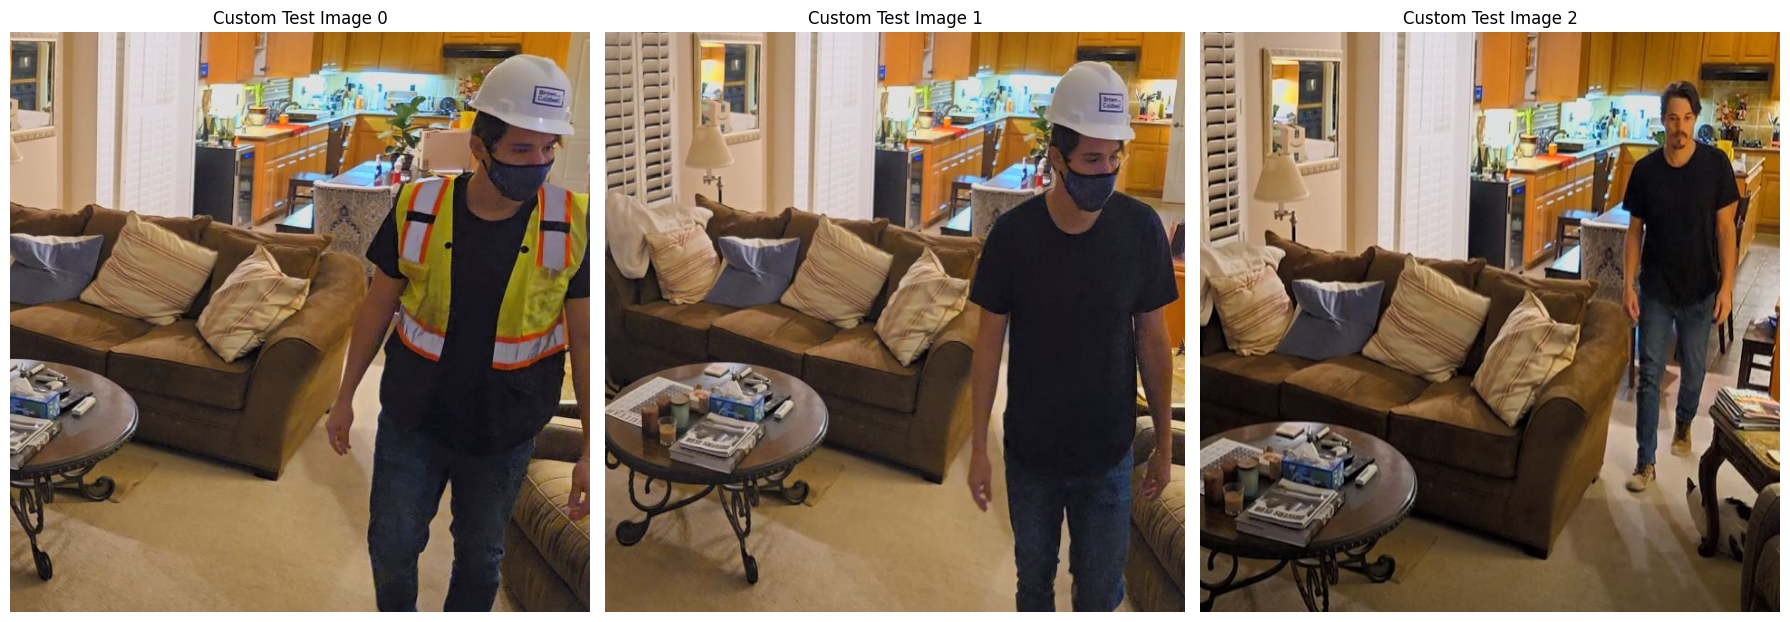

In [8]:
# Get the paths to the first three custom images
image_paths = glob.glob(f"{image_dirs["train"]}/scene*.jpg")[:3] # modify file desc as needed

# Check if there are enough images
if len(image_paths) < 3:
    print("Not enough images found!")
else:
    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 7))  # Adjust the figsize as needed

    for i, ax in enumerate(axes):
        # Load and display each image
        image = mpimg.imread(image_paths[i])
        ax.imshow(image)
        ax.axis('off')  # Hide axes
        ax.set_title(f"Custom Test Image {i}") # modify file desc as needed

    plt.tight_layout()
    plt.show()

# Predict test images with fine tuned model (best.pt)

In [6]:
# Remove previous predictions
# Path to the detect folder
detect_path = "./runs/detect/"
# Iterate through subdirectories and delete folders starting with "predict"
for folder in os.listdir(detect_path):
    folder_path = os.path.join(detect_path, folder)
    if os.path.isdir(folder_path) and folder.startswith("predict"):
        shutil.rmtree(folder_path, ignore_errors=True)

# model = runs/detect/train/weights/best.pt
model = YOLO("runs/detect/train/weights/best.pt")

# Run inference on any custom image in the test folder
model.predict("./datasets/images/test/scene*.jpg", save=True, imgsz=640, conf=0.45, agnostic_nms=True, iou=0.7) # modify file desc as needed


image 1/4 C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project\train_from_model\datasets\images\test\scene1_all_2.jpg: 640x640 1 Hardhat, 1 Mask, 1 Person, 1 Safety Vest, 42.1ms
image 2/4 C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project\train_from_model\datasets\images\test\scene1_hatmask_2.jpg: 640x640 1 Hardhat, 1 Mask, 1 NO-Safety Vest, 1 Person, 33.1ms
image 3/4 C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project\train_from_model\datasets\images\test\scene1_none_1.jpg: 640x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 32.0ms
image 4/4 C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project\train_from_model\datasets\images\test\scene3_none_5.jpg: 640x640 1 NO-Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 38.6ms
Speed: 1.8ms preprocess, 36.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Hardhat', 1: 'Mask', 2: 'NO-Hardhat', 3: 'NO-Mask', 4: 'NO-Safety Vest', 5: 'Person', 6: 'Safety Cone', 7: 'Safety Vest', 8: 'Machinery', 9: 'Vehicle'}
 obb: None
 orig_img: array([[[138, 158, 189],
         [136, 157, 188],
         [132, 156, 186],
         ...,
         [103, 146, 173],
         [104, 144, 172],
         [104, 144, 172]],
 
        [[140, 160, 191],
         [137, 158, 189],
         [132, 156, 186],
         ...,
         [104, 147, 174],
         [105, 145, 173],
         [104, 144, 172]],
 
        [[140, 161, 189],
         [137, 159, 187],
         [129, 153, 183],
         ...,
         [105, 145, 173],
         [104, 145, 170],
         [103, 144, 169]],
 
        ...,
 
        [[ 58, 100, 129],
         [ 58, 100, 129],
         [ 57,  99, 128],
         ...,
         [ 33,  32,  41],
         [ 40,  39,  4

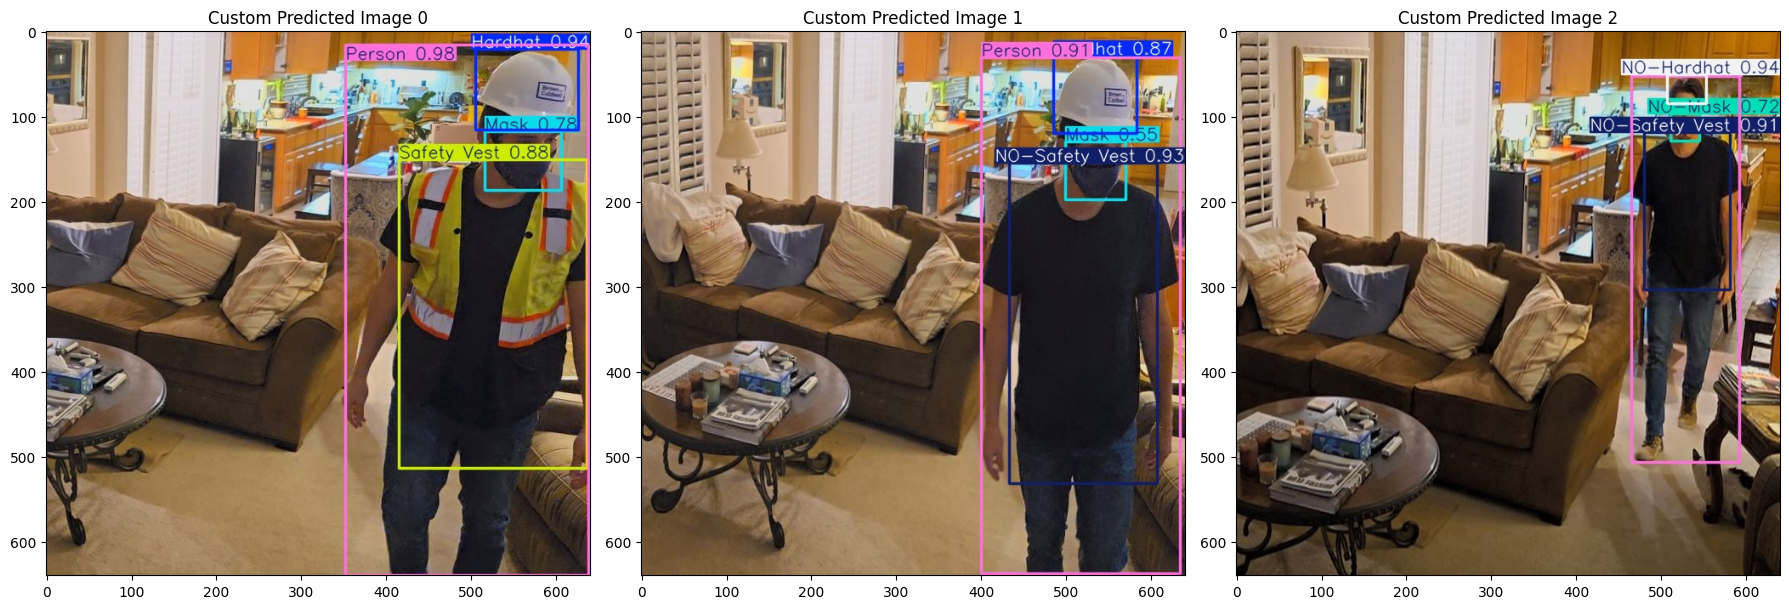

In [7]:
# Get the paths to the first three custom images
image_paths = glob.glob(f"{image_dirs["train"]}/scene*.jpg")[:3] # modify file desc as needed

# Check if there are enough images
if len(image_paths) < 3:
    print("Not enough images found!")
else:
    # Create a subplot with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 7))  # Adjust the figsize as needed

    for i, ax in enumerate(axes):
        # Load and display each image
        image = mpimg.imread(image_paths[i])
        ax.imshow(image)
        # ax.axis('on')  # Hide axes
        ax.set_title(f"Custom Predicted Image {i}") # modify file desc as needed

    plt.tight_layout()
    plt.show()